Kacper Staroń
298842

## PD7 Kompresja/PCA

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

## Przygotowanie środowiska

In [68]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Załadowanie grafiki

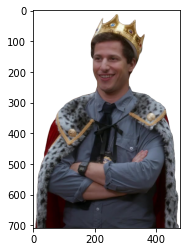

In [69]:
img = mpimg.imread('https://66.media.tumblr.com/e1877f95af28f6aa0163c50856cc9410/tumblr_os9bbs9Mzd1rxkqbso1_500.png') 
plt.imshow(img) 

In [70]:
img.shape

(708, 479, 4)

## Funkcja kompresująca

Funkcja `pca_compression` przyjmuje parametry:
* $n$ - ilość komponentów wyznaczanych w algorytmie PCA
* $img$ - standardowa trójwymiarowa macierz reprezentująca plik png

Zwraca także dwie wartości:
* $img2$ - przetworzona macierz skompresowanego pliku
* $size$ - rozmiar skompresowanego pliku jako suma rozmiarów macierzy niezbędnych do jego odtworzenia

In [71]:
def pca_compression(n, img):
    img_temp = np.reshape(img, (img.shape[0], img.shape[1]*img.shape[2]))
    pca = PCA(n_components = n)
    pca.fit(img_temp)
    img_temp = pca.transform(img_temp)
    size = img_temp.size + pca.components_.size
    img_temp = pca.inverse_transform(img_temp)
    img2 = np.reshape(img_temp, (img.shape[0], img.shape[1], img.shape[2]))
    return img2, size

## Działanie

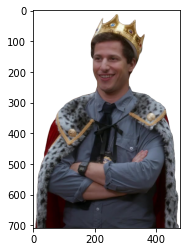

In [72]:
plt.imshow(img) 

In [73]:
img.size

1356528

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rozmiar oryginału: 1356528
Rozmiar skompresowanego: 26240
1.9343500465895287


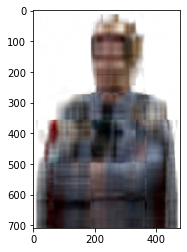

In [74]:
i1, s1 = pca_compression(10, img)
plt.imshow(i1)
print("Rozmiar oryginału: " + str(img.size))
print("Rozmiar skompresowanego: " + str(s1))
print(s1 / img.size * 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rozmiar oryginału: 1356528
Rozmiar skompresowanego: 26240
1.9343500465895287


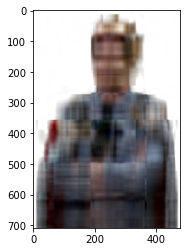

In [75]:
i1, s1 = pca_compression(10, img)
plt.imshow(i1)
print("Rozmiar oryginału: " + str(img.size))
print("Rozmiar skompresowanego: " + str(s1))
print(s1 / img.size * 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rozmiar oryginału: 1356528
Rozmiar skompresowanego: 52480
3.8687000931790574


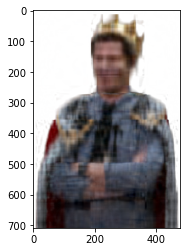

In [76]:
i1, s1 = pca_compression(20, img)
plt.imshow(i1)
print("Rozmiar oryginału: " + str(img.size))
print("Rozmiar skompresowanego: " + str(s1))
print(s1 / img.size * 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rozmiar oryginału: 1356528
Rozmiar skompresowanego: 78720
5.803050139768586


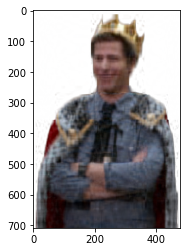

In [77]:
i1, s1 = pca_compression(30, img)
plt.imshow(i1)
print("Rozmiar oryginału: " + str(img.size))
print("Rozmiar skompresowanego: " + str(s1))
print(s1 / img.size * 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rozmiar oryginału: 1356528
Rozmiar skompresowanego: 131200
9.671750232947643


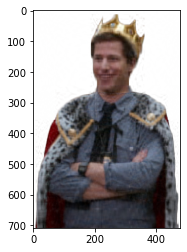

In [78]:
i1, s1 = pca_compression(50, img)
plt.imshow(i1)
print("Rozmiar oryginału: " + str(img.size))
print("Rozmiar skompresowanego: " + str(s1))
print(s1 / img.size * 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rozmiar oryginału: 1356528
Rozmiar skompresowanego: 262400
19.343500465895286


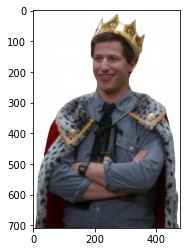

In [79]:
i1, s1 = pca_compression(100, img)
plt.imshow(i1)
print("Rozmiar oryginału: " + str(img.size))
print("Rozmiar skompresowanego: " + str(s1))
print(s1 / img.size * 100)

Na podstawie powyższych wizualizacji widzimy, że dla tego konkretnego pliku jesteśmy w stanie uzyskać zadowalający poziom szczegółowości już dla `n=100`, czyli przy wykorzystaniu ok. $20$% rozmiaru wyjściowego pliku.